# Golm Tree Analysis 

1. Count the number of trees on Campus Golm 
2. What area is covered by trees ? 
3. Percentage of trees that are decidius? 

In [19]:
import numpy as np
import laspy
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Set the parameters
las_file_path = "../data/Golm_May06_2018_Milan_UTM33N_WGS84_6digit_cl.las"
tif_file_path = "../data/40cm_CIR_Clipped.tiff"

# Read the .las file
in_file = laspy.read(las_file_path)
#Read the .tiff file
tif_data = rasterio.open(tif_file_path)





In [50]:

# Set the parameters

tree_height_threshold = 5.0  # Set the height threshold for tree identification
min_cluster_points = 15  # Set the minimum number of points in a cluster
epsilon = 0.1  # Set the maximum distance between points in a cluster
chunk_size = 10000  # Set the number of points to process in each chunk


In [51]:
# Get the total number of points
point_count = len(in_file.points)

# Collect tree points
tree_points = []
for i in range(0, point_count, chunk_size):
    # Read a chunk of the data
    points = np.column_stack((in_file.x[i:i+chunk_size], in_file.y[i:i+chunk_size], in_file.z[i:i+chunk_size]))

    # Apply height threshold to identify potential tree points
    tree_indices = np.where(points[:, 2] > tree_height_threshold)[0]  # Convert indices to a NumPy array
    tree_points.extend(points[tree_indices])

# Convert tree_points to a NumPy array
tree_points = np.array(tree_points)

In [52]:
# Perform clustering using DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_cluster_points)
dbscan.fit(tree_points)

# Get the labels assigned by DBSCAN
labels = dbscan.labels_

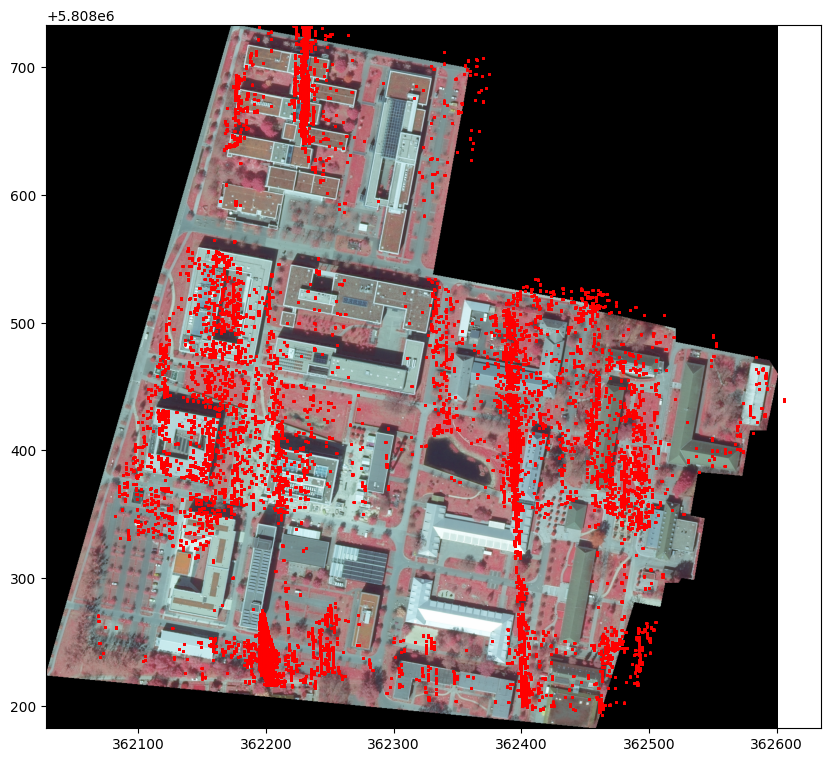

In [48]:
fig, ax = plt.subplots(figsize=(10, 10))
show(tif_data, ax=ax, cmap='gray')

# Overlay tree points on the map
tree_mask = labels != -1  # Exclude noise points
tree_coords = tree_points[tree_mask, :2]  # Get the (x, y) coordinates of tree points
ax.scatter(tree_coords[:, 0], tree_coords[:, 1], c='red', marker='.', s=5)

# Show the plot
plt.show()

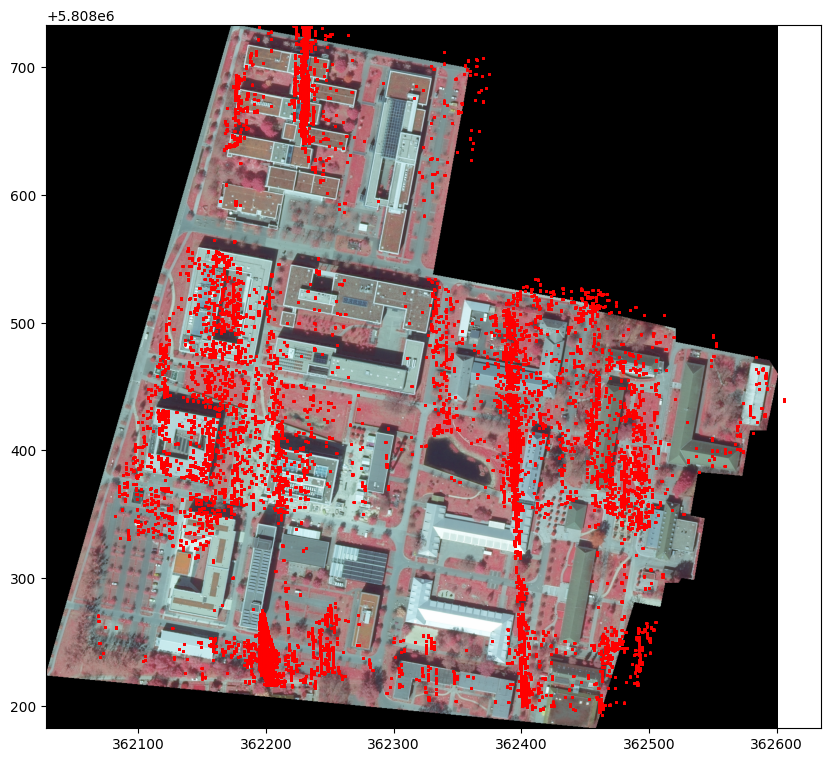

In [49]:
# Plot the TIFF file
fig, ax = plt.subplots(figsize=(10, 10))
show(tif_data, ax=ax, cmap='gray')

# Overlay tree points on the map
tree_mask = labels != -1  # Exclude noise points
tree_indices = np.where(tree_mask)[0]  # Get the indices of tree points
tree_coords = tree_points[tree_indices, :2]  # Get the (x, y) coordinates of tree points
ax.scatter(tree_coords[:, 0], tree_coords[:, 1], c='red', marker='.', s=5)

# Show the plot
plt.show()